In [54]:
#### https://www.youtube.com/watch?v=9-2cdbV3BTk
#### https://github.com/minsuk-heo/deeplearning/blob/master/src/MLP_MNIST_Tensorflow.ipynb


# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# https://www.cnblogs.com/ping2yingshi/p/12920537.html

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [55]:
## data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


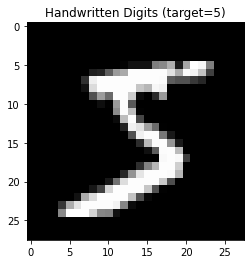

In [56]:
# Plot the first image in training set
plt.gray()

plt.title('Handwritten Digits (target='+ str(y_train[0])+")")
plt.imshow(x_train[0])
plt.show()

In [57]:
## reshape into 2-D
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [58]:
## normalisation

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

In [59]:
## encoding labels

num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

y_train.shape

(60000, 10)

In [60]:
## split training into train and validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25)

In [61]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(45000, 784)
(15000, 784)
(10000, 784)
(45000, 10)
(10000, 10)
(15000, 10)


In [62]:
## MLP model
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

In [63]:
def mlp(x):
    # hidden layer1
    w1 = tf.Variable(tf.random_uniform([784,256]))
    b1 = tf.Variable(tf.zeros([256]))
    h1 = tf.nn.relu(tf.matmul(x, w1) + b1)
    # hidden layer2
    w2 = tf.Variable(tf.random_uniform([256,128]))
    b2 = tf.Variable(tf.zeros([128]))
    h2 = tf.nn.relu(tf.matmul(h1, w2) + b2)
    # output layer
    w3 = tf.Variable(tf.random_uniform([128,10]))
    b3 = tf.Variable(tf.zeros([10]))
    logits= tf.matmul(h2, w3) + b3
    
    return logits

logits = mlp(x)


In [64]:
## loss
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y))

In [65]:
## optimizer
train_op = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss_op)

In [66]:
# initialization
init = tf.global_variables_initializer()

# train hyperparameters
epoch_cnt = 50
batch_size = 1000
iteration = len(x_train) // batch_size

# Start training
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)
    for epoch in range(epoch_cnt):
        avg_loss = 0.
        start = 0; end = batch_size
        
        for i in range(iteration):
            _, loss = sess.run([train_op, loss_op], 
                               feed_dict={x: x_train[start: end], y: y_train[start: end]})
            start += batch_size; end += batch_size
            # Compute average loss
            avg_loss += loss / iteration
            
        # Validate model
        preds = tf.nn.softmax(logits)  # Apply softmax to logits
        correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(y, 1))
        # Calculate accuracy
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        cur_val_acc = accuracy.eval({x: x_val, y: y_val})
        print("epoch: "+str(epoch)+", validation accuracy: " 
              + str(cur_val_acc) +', loss: '+str(avg_loss))
    
    # Test model
    preds = tf.nn.softmax(logits)  # Apply softmax to logits
    correct_prediction = tf.equal(tf.argmax(preds, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("[Test Accuracy] :", accuracy.eval({x: x_test, y: y_test}))

epoch: 0, validation accuracy: 0.17133333, loss: 10052.324245876734
epoch: 1, validation accuracy: 0.6426, loss: 478.77253875732424
epoch: 2, validation accuracy: 0.8477333, loss: 21.771773571438256
epoch: 3, validation accuracy: 0.87053335, loss: 10.51532491048177
epoch: 4, validation accuracy: 0.8832667, loss: 8.017557027604845
epoch: 5, validation accuracy: 0.88813335, loss: 6.44589057498508
epoch: 6, validation accuracy: 0.8919333, loss: 5.341156721115113
epoch: 7, validation accuracy: 0.89306664, loss: 4.593703540166219
epoch: 8, validation accuracy: 0.888, loss: 4.034516006045871
epoch: 9, validation accuracy: 0.8844, loss: 3.5967392338646778
epoch: 10, validation accuracy: 0.8933333, loss: 3.353362475501166
epoch: 11, validation accuracy: 0.89493334, loss: 2.9834999190436475
epoch: 12, validation accuracy: 0.8864667, loss: 2.7835538864135745
epoch: 13, validation accuracy: 0.897, loss: 2.725051715638903
epoch: 14, validation accuracy: 0.8905333, loss: 3.3142382754219906
epoch: 1